In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SKMeans

# K Means

## 1. Top-Level

### 1.1 High-level explanation

K means is an unsupervised clustering algorithm which will attempt to find the center of "like features" based on the summed euclidean distance of all data given. This algorithm is greedy in the sense that its decision to group things is absolute. Consider the example below of two Gaussian clouds. We assume that a K means algorithm found the center of the clusters to be $(-2,-2)={\rm Blue}$, and $(2,2)={\rm Red}$. We then get a new data point at location $(0,0.1)$, shown in black, and we ask "What cluster does this point belong to?"

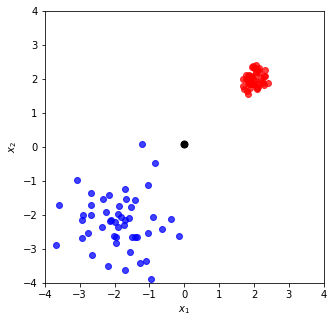

In [63]:
X = np.zeros(shape=(100,2))
Y = np.zeros(shape=(100))
X[:50,:] = np.random.randn(50,2)/5 + 2
X[50:,:] = np.random.randn(50,2)/1.2- 2
Y[:50] = 1
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], color='b', alpha=.75)
plt.scatter(X[Y==1,0], X[Y==1,1], color='r', alpha=.75)
plt.scatter([0], [0.1], color='black', s=50)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
plt.show()

To find which cluster this new data point would belong to, we find the euclidean distance to the centers.

$$
\begin{align*}
\mathcal{D_b} &=  \sqrt { \sum_i \left( c^b_i - x_i \right)^2 } \\
&= 2.9 \\ \\[5mm]
\mathcal{D_r} &=  \sqrt { \sum_i \left( c^r_i - x_i \right)^2 } \\ 
&= 2.76
\end{align*}
$$

Because $\mathcal{D_r} < \mathcal{D_b}$ we say (with 100% confidence) that the new data point belongs to the ${\rm Red}$ cluster.

### 1.2 What scenario should you use K means?

K means is a general-purpose clustering approach. It can be used when even sized, spherical clusters can be assumed. It preforms best when there are only a few clusters.

### 1.3 What types of features does the model use?

The model makes the assumption that the data is clustered into spherical groups. Text, and continious data

### 1.4 When does  the model break?
The model will break when the data does not fall into spherical groups. For example, consider two elliptical cluster:

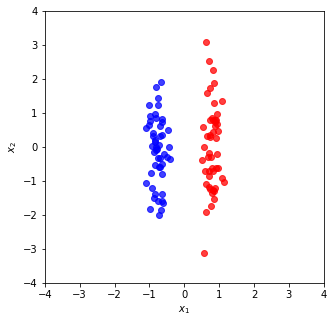

In [69]:
X = np.zeros(shape=(100,2))
Y = np.zeros(shape=(100))
X[:50,:] = np.transpose([np.random.randn(50,1)/6 + .75, np.random.randn(50,1)])
X[50:,:] = np.transpose([np.random.randn(50,1)/6 - .75, np.random.randn(50,1)])
Y[:50] = 1
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], color='b', alpha=.75)
plt.scatter(X[Y==1,0], X[Y==1,1], color='r', alpha=.75)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
plt.show()

We run SK-learn's Kmeans algorithm on the input data, to find the predicted categories:

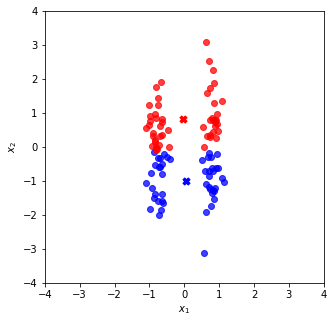

In [72]:
kmeans = SKMeans(2, algorithm='elkan')
Y_hat = kmeans.fit_predict(X)
plt.figure(figsize=(5,5))
plt.scatter(X[Y_hat==0,0], X[Y_hat==0,1], color='b', alpha=.75)
plt.scatter(X[Y_hat==1,0], X[Y_hat==1,1], color='r', alpha=.75)
Cb, Cr = kmeans.cluster_centers_
plt.scatter(Cb[0], Cb[1], color='b', marker='X', s=50)
plt.scatter(Cr[0], Cr[1], color='r', marker='X', s=50)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
plt.show()

The "X-marker" marks the predicted centers of the ${\rm Red}$ and ${\rm Blue}$ clusters. We can see it's converged to an incorrect location, despite there being an obvious separation of the data.  

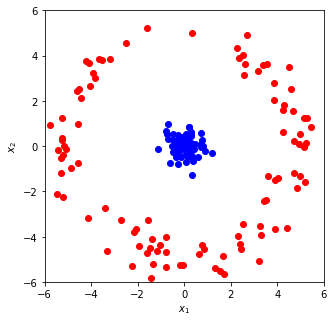

In [79]:
r1 = np.random.randn(100)/2
r2 = np.random.randn(100)/2+5
theta = 2*np.pi*np.random.randn(100)
bx1 = r1*np.cos(theta)
bx2 = r1*np.sin(theta)
rx1 = r2*np.cos(theta)
rx2 = r2*np.sin(theta)
plt.figure(figsize=(5,5))
plt.scatter(bx1,bx2, color='b')
plt.scatter(rx1,rx2, color='r')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

### 1.5 What to use when it breaks? Whats a good back up?

An easy change can be to use "soft kmeans"...



Sklearn has a good table on the use cases and fall-back models for clustering:

http://scikit-learn.org/stable/modules/clustering.html

## 2. A bit more detail

### 2.1 How do you normalize the data for the model, if you need to?

### 2.2 How to initialize parameters at beginning (e.g. where to put centroid in KMeans)?

Because K means has a tendency of converging to local minima, cluster are usually initializes in random locations, and the algorithm is run multiple times. 

### 2.3 What's the loss function used?

### 2.4 What's the complexity? Does it scale?

The complexity of the problem is of the order 

$$
\mathcal{O}(I\cdot N\cdot D \cdot C)
$$

wherein $I$ is iterations; $N$ is number of data points; $D$ is dimensions; and $C$ is the number of clusters. Some short cuts can be taken, such as only taken a small sample of the total number of data points, but overall, Kmeans does not scale very well. 

## 3. In-depth

### 3.1 Derive the math

The math behind kmeans is quite simple, and there's nothing really to derive. So we'll just do a simple step-by-step example. Say we have the following data that we're trying to cluster, and we drop two centroids onto the data at random locations:

To converge on the clusters we will do the following steps:

 1. Calculate the distance from every single data point to centroid 1 and centroid 2
 2. Assign each data point to the centroid that it is closer to
 3. For every single data point assigned to a cluster, take the mean value $\frac{1}{N}\sum_i (x_i, y_i)$
 4. Move the centroid to this coordinate
 5. Repeat


### 3.2 Simple implementation

In [116]:
class Kmeans:
    
    def __init__(self, clusters):
        self._num_clusters = 2
    
    @property
    def centroids(self):
        pass
    
    def fit(self, X, epochs=10, return_labels=True):
        N, D = X.shape
        self._centroids = X.max(axis=0)*np.random.random((self._num_clusters, D))
        Y = np.zeros(N)
        _deltas = np.zeros((self._num_clusters, N))
        
        for _ in range(epochs):
            
            # Find the eculidian distance
            for c in range(self._num_clusters):
                _deltas[c,...] = np.sum(np.subtract(self._centroids[c,...], X)**2, axis=1)
            
            # Assign the data with minimum distances to the respective centroids
            Y = np.argmin(_deltas, axis=0)
            
            # Update the centroid
            for c in range(self._num_clusters):
                self._centroids[c,...] = X[Y==c].mean(axis=0)
    
        if return_labels:
            return Y
        

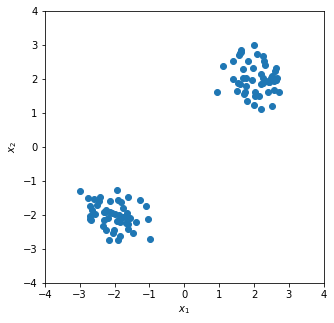

In [117]:
X = np.zeros(shape=(100,2))
X[:50,:] = np.random.randn(50,2)/2 + 2
X[50:,:] = np.random.randn(50,2)/2 - 2
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
plt.show()

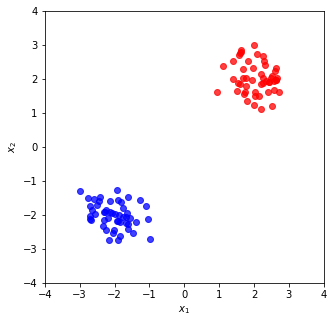

In [118]:
kmeans = Kmeans(clusters=2)
Y = kmeans.fit(X)

plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], color='b', alpha=.75)
plt.scatter(X[Y==1,0], X[Y==1,1], color='r', alpha=.75)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
plt.show()